## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [2]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F4EA948>,
      dtype=object)

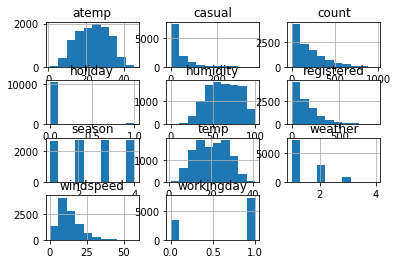

In [10]:
df.hist()

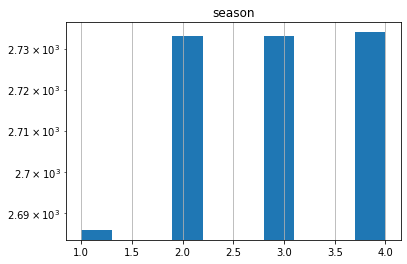

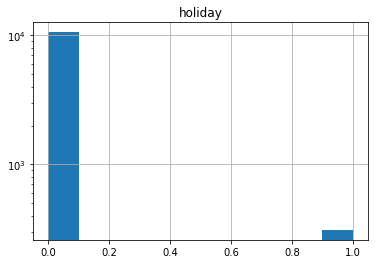

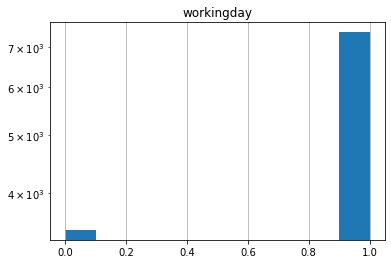

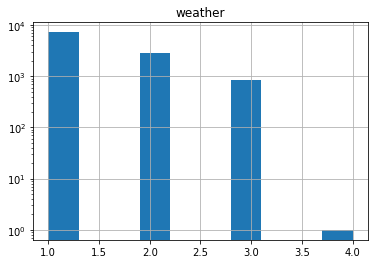

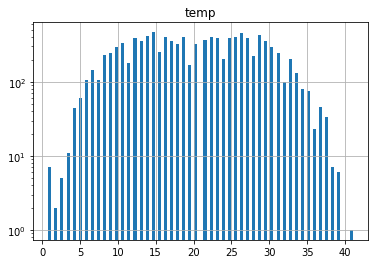

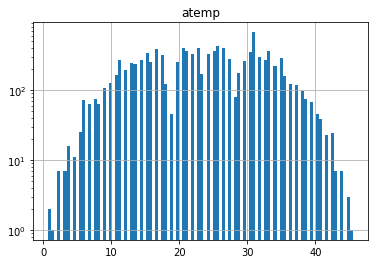

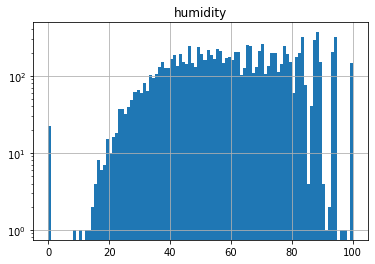

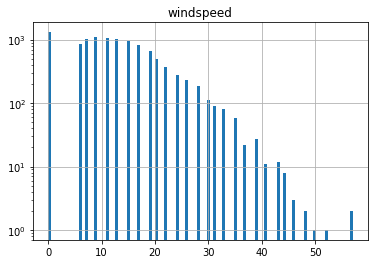

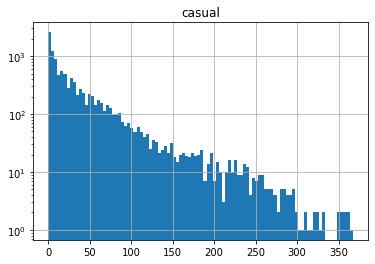

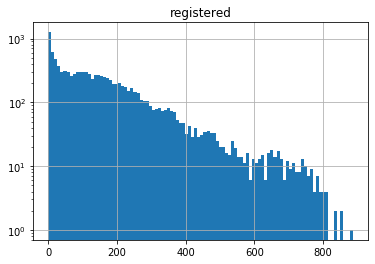

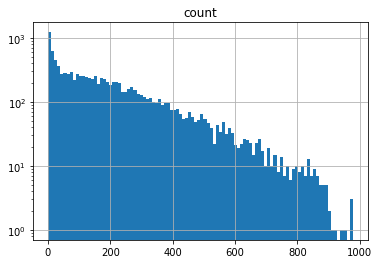

In [39]:
# в задании сказано использовать hist, с использование seaborn не стала рисовать
for col in df.columns:
    plt.figure()
    plt.title(col)
    bins = None
    if df[col].nunique() > 10:
        bins = 100
    df[col].hist(log=True, bins=bins)

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [62]:
df.apply(lambda x: x.value_counts().nlargest(10))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0.0000,NaN,10575.0,3474.0,NaN,NaN,NaN,NaN,1313.0,986.0,NaN,NaN
1.0000,2686.0,311.0,7412.0,7192.0,NaN,NaN,NaN,NaN,667.0,135.0,105.0
2.0000,2733.0,NaN,NaN,2834.0,NaN,NaN,NaN,NaN,487.0,150.0,132.0
3.0000,2733.0,NaN,NaN,859.0,NaN,NaN,NaN,NaN,438.0,195.0,144.0
4.0000,2734.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,354.0,190.0,149.0
5.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0,177.0,169.0
6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,155.0,135.0
6.0032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,872.0,NaN,NaN,NaN
7.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,126.0,118.0
7.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1034.0,NaN,NaN,NaN


In [72]:
df_params = df.describe(percentiles=[.5, .75, .99]).loc[['mean', 'std', '50%', '75%', '99%']]
disp_series = (df_params.loc['std'] ** 2)
disp_series.name = 'dispersion'
df_params = df_params.append(disp_series)
df_params = df_params.append(df.mode().set_index(pd.Index(['mode'])))
df_params

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
99%,4.000000,1.000000,1.000000,3.000000,36.080000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
dispersion,1.245845,0.027755,0.217304,0.401751,60.708872,71.818856,370.371306,66.659670,2496.049219,22812.789514,32813.313153
mode,4.000000,0.000000,1.000000,1.000000,14.760000,31.060000,88.000000,0.000000,0.000000,3.000000,5.000000


## Выводы
Ближе всего к нормальному распределению temp, atemp, humidity, windspeed.


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [73]:
df_params = df_params.append(pd.Series(kurtosis(df), name='excess', index=df.columns))
df_params = df_params.append(pd.Series(skew(df), name='asymmetry', index=df.columns))
df_params

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
99%,4.000000,1.000000,1.000000,3.000000,36.080000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
dispersion,1.245845,0.027755,0.217304,0.401751,60.708872,71.818856,370.371306,66.659670,2496.049219,22812.789514,32813.313153
mode,4.000000,0.000000,1.000000,1.000000,14.760000,31.060000,88.000000,0.000000,0.000000,3.000000,5.000000
excess,-1.355590,30.032624,-1.397737,0.394800,-0.914661,-0.850236,-0.760020,0.629292,7.547610,2.624324,1.298945
asymmetry,-0.007075,5.659737,-0.776056,1.243313,0.003690,-0.102545,-0.086323,0.588685,2.495404,1.524594,1.241895


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

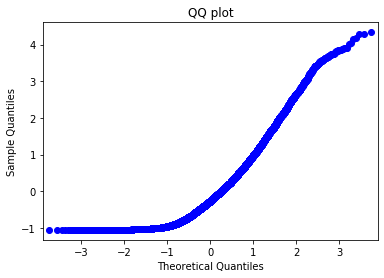

In [82]:
import statsmodels.api as sm
sm.qqplot(df['count'], fit = True)
plt.title("QQ plot")
plt.show()

In [76]:
def my_norm_confidence(df=df, column="count", alpha=0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [77]:
confidence = my_norm_confidence()
print(confidence)

(-163.46247359398893, 546.6107374190854)


Text(0.5, 1.0, 'Доверительный интервал')

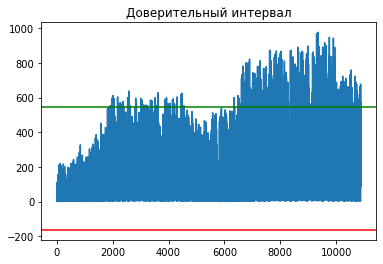

In [80]:
df['count'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

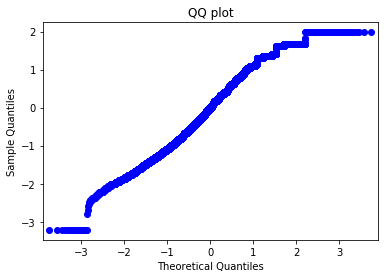

In [83]:
# возьмём показатель с самой большой дисперсией из тех, что больше похожи на нормальное распределение
# humidity
sm.qqplot(df.humidity, fit = True)
plt.title("QQ plot")
plt.show()

In [84]:
confidence = my_norm_confidence(column = "humidity")
print(confidence)

(24.16688756800584, 99.60603177794309)


Text(0.5, 1.0, 'Доверительный интервал')

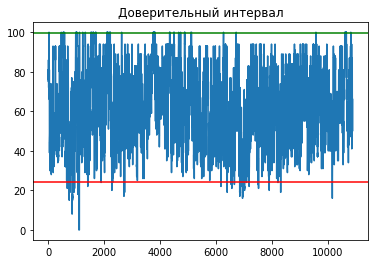

In [86]:
df.humidity.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [88]:
def find_anomaly(df, column):
    # оставила ради интереса 99 квантиль.
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [103]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Количество аномалий для метрики temp: 0.010747749402902811
Количество аномалий для метрики atemp: 0.013687304795149733
Количество аномалий для метрики humidity: 0.013595443689142016
Количество аномалий для метрики windspeed: 0.007348888480617307
Количество аномалий для метрики casual: 0.016810582399412088
Количество аномалий для метрики registered: 0.011482638250964542
Количество аномалий для метрики count: 0.0034907220282932206


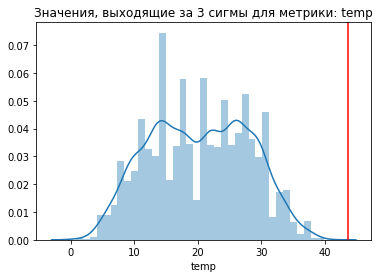

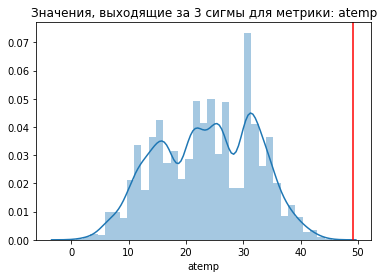

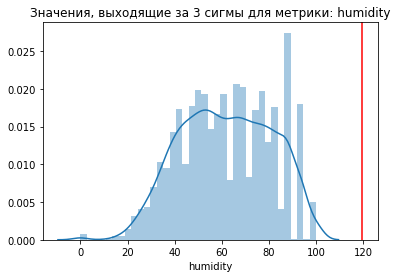

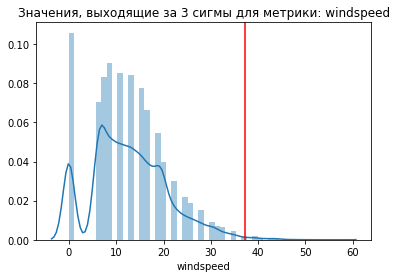

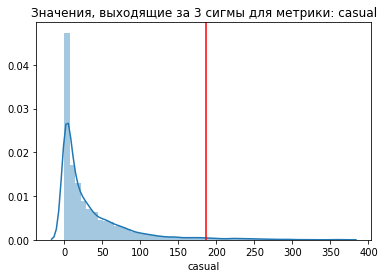

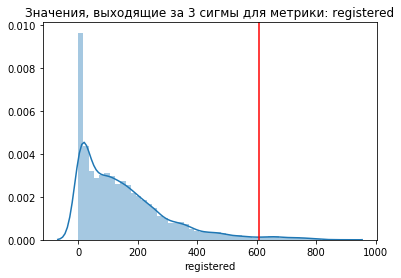

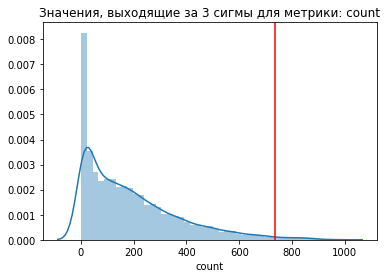

In [104]:
research_list = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for col in research_list:
    anomaly = find_anomaly(df=df, column=col)
    print(f'Количество аномалий для метрики {col}: {len(anomaly[0])/len(df)}')
    fig, ax = plt.subplots()
    ax.set_title('Значения, выходящие за 3 сигмы для метрики: ' + col)
    sns.distplot(df[col])
    ax.axvline(x=anomaly[1], color="r", linestyle="-")

Для метрики casual количество аномальных значений ~1,7%, что является наибольшим количеством аномалий из исследуемых параметров.

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [74]:
corr_m = df.corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


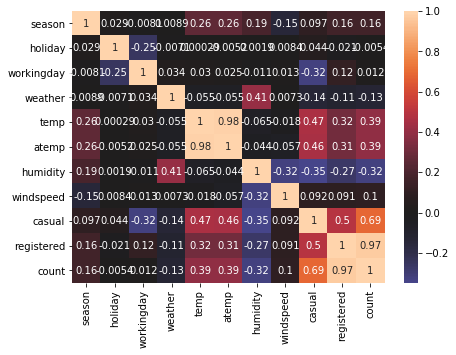

In [75]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

## Выводы
Весьма высокую зависимость имеют параметры count и registered, а также temp и atemp
Заметную (очень близко к высокой) - casual и count
Также заметно коррелируют параметрры registered и casual
Можно отметить умеренную корреляцию между temp/atemp и casual/count

Значительной обратной корреляции почти не наблюдается.